In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import yfinance as yf


In [2]:
#load data
AAPL=yf.download("AAPL",start="2019-01-01" , end="2021-01-01")


[*********************100%***********************]  1 of 1 completed


In [3]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.124840,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168350,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366505,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833569,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753822,219111200
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.620895,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.292664,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.491241,121047300


In [4]:
#storing data
AAPL.to_csv("appledata.csv")

In [5]:
AAPL=pd.read_csv("appledata.csv")

In [6]:
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,39.632500,39.840000,39.119999,39.435001,38.124840,140014000
1,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168350,148158800
2,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366505,365248800
3,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833569,234428400
4,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753822,219111200
...,...,...,...,...,...,...,...
501,2020-12-24,131.320007,133.460007,131.100006,131.970001,130.620895,54930100
502,2020-12-28,133.990005,137.339996,133.509995,136.690002,135.292664,124486200
503,2020-12-29,138.050003,138.789993,134.339996,134.869995,133.491241,121047300
504,2020-12-30,135.580002,135.990005,133.399994,133.720001,132.353027,96452100


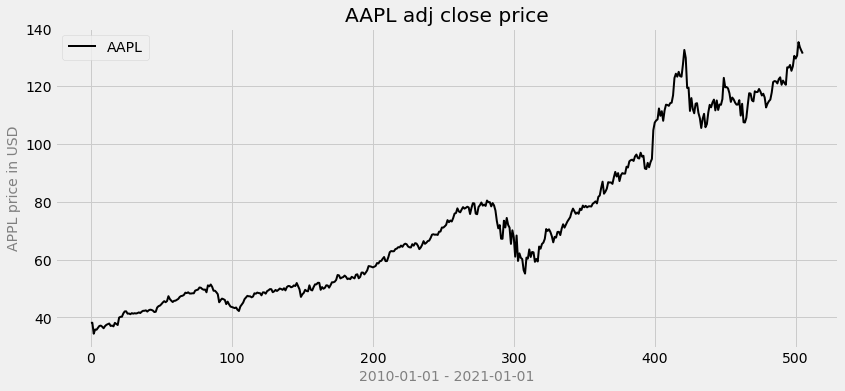

In [7]:
#Visualization of Data
plt.figure(figsize=(12.5,5.5))
plt.plot(AAPL["Adj Close"],label="AAPL",color="black",linewidth=2.0)
plt.title("AAPL adj close price")
plt.xlabel("2010-01-01 - 2021-01-01",fontsize=14,color="grey")
plt.ylabel("APPL price in USD",fontsize=14,color="grey")
plt.legend(loc="upper left")
plt.show()


In [8]:
#creating simple moving average of 20 period
SMA20=pd.DataFrame()
SMA20["Adj Close"]=AAPL["Adj Close"].rolling(window=20).mean()
SMA20

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
501,123.626146
502,124.620873
503,125.403786
504,125.948164


In [9]:
SMA20["new column"]=np.NaN
SMA20

,Adj Close,new column
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
501,123.626146,NaN
502,124.620873,NaN
503,125.403786,NaN
504,125.948164,NaN


In [10]:
#creating simple moving average of 50 period
SMA50=pd.DataFrame()
SMA50["Adj Close"]=AAPL["Adj Close"].rolling(window=50).mean()
SMA50

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
501,118.450187
502,118.770636
503,119.088452
504,119.443580


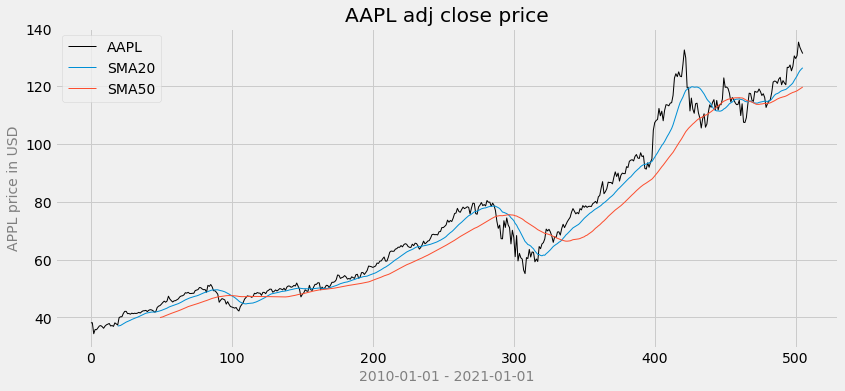

In [11]:
#Visualization of Stock Data along with SMAs
plt.figure(figsize=(12.5,5.5))
plt.plot(AAPL["Adj Close"],label="AAPL",color="black",linewidth=1.0)
plt.plot(SMA20["Adj Close"],label="SMA20",linewidth=1.0)
plt.plot(SMA50["Adj Close"],label="SMA50",linewidth=1.0)
plt.title("AAPL adj close price")
plt.xlabel("2010-01-01 - 2021-01-01",fontsize=14,color="grey")
plt.ylabel("APPL price in USD",fontsize=14,color="grey")
plt.legend(loc="upper left")
plt.show()

In [12]:
#creating a new datafram to store all the data
data=pd.DataFrame()
data["AAPL"]=AAPL["Adj Close"]
data["SMA20"]=SMA20["Adj Close"]
data["SMA50"]=SMA50["Adj Close"]
data

,AAPL,SMA20,SMA50
0,38.124840,NaN,NaN
1,38.168350,NaN,NaN
2,34.366505,NaN,NaN
3,35.833569,NaN,NaN
4,35.753822,NaN,NaN
...,...,...,...
501,130.620895,123.626146,118.450187
502,135.292664,124.620873,118.770636
503,133.491241,125.403786,119.088452
504,132.353027,125.948164,119.443580


In [13]:
#create a function when to buy and when to sell
def buy_sell(data):
    sigPriceBuy=[]
    sigPriceSell=[]
    flag= -1
    
    for i in range(len(data)):
            if data['SMA20'][i]>data['SMA50'][i]:
                if flag!=1:
                    sigPriceBuy.append(data['AAPL'][i])
                    sigPriceSell.append(np.nan)
                    flag=1
                else:
                    sigPriceBuy.append(np.nan)
                    sigPriceSell.append(np.nan)
            elif data['SMA20'][i]<data['SMA50'][i]:
                if flag!=0:
                    sigPriceBuy.append(np.nan)
                    sigPriceSell.append(data['AAPL'][i])
                    flag=0
                else:
                    sigPriceBuy.append(np.nan)
                    sigPriceSell.append(np.nan)
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
    return(sigPriceBuy,sigPriceSell)
                    
            
                        
    
   
                                 
                    
            
                    
        

In [14]:
#store the buy and sell data into a variable
buy_sell=buy_sell(data)
data['Buy_Signal_Price']= buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]

In [15]:
data

,AAPL,SMA20,SMA50,Buy_Signal_Price,Sell_Signal_Price
0,38.124840,NaN,NaN,NaN,NaN
1,38.168350,NaN,NaN,NaN,NaN
2,34.366505,NaN,NaN,NaN,NaN
3,35.833569,NaN,NaN,NaN,NaN
4,35.753822,NaN,NaN,NaN,NaN
...,...,...,...,...,...
501,130.620895,123.626146,118.450187,NaN,NaN
502,135.292664,124.620873,118.770636,NaN,NaN
503,133.491241,125.403786,119.088452,NaN,NaN
504,132.353027,125.948164,119.443580,NaN,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AAPL               506 non-null    float64
 1   SMA20              487 non-null    float64
 2   SMA50              457 non-null    float64
 3   Buy_Signal_Price   4 non-null      float64
 4   Sell_Signal_Price  3 non-null      float64
dtypes: float64(5)
memory usage: 19.9 KB


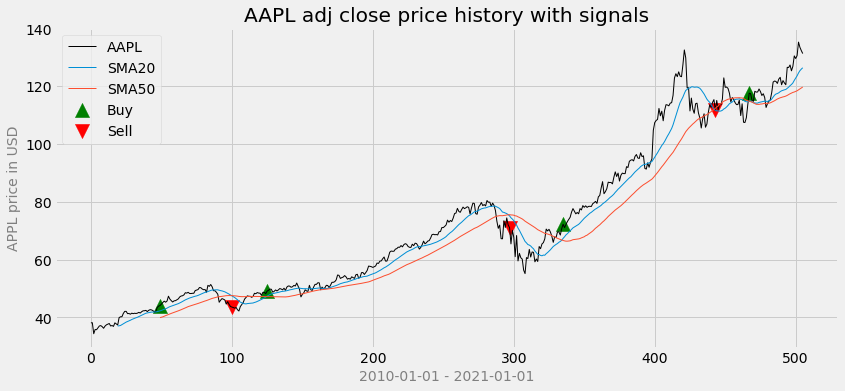

In [17]:
#Visualization of signals
plt.figure(figsize=(12.5,5.5))
plt.plot(AAPL["Adj Close"],label="AAPL",color="black",linewidth=1.0)
plt.plot(SMA20["Adj Close"],label="SMA20",linewidth=1.0)
plt.plot(SMA50["Adj Close"],label="SMA50",linewidth=1.0)
plt.scatter(data.index,data['Buy_Signal_Price'],label='Buy',marker="^",s=200,color="green")
plt.scatter(data.index,data['Sell_Signal_Price'],label='Sell',marker="v",s=200,color="red")
plt.title("AAPL adj close price history with signals")
plt.xlabel("2010-01-01 - 2021-01-01",fontsize=14,color="grey")
plt.ylabel("APPL price in USD",fontsize=14,color="grey")
plt.legend(loc="upper left")
plt.show()